In [4]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline

# preprocessing pipeline:
from src.data.make_dataset import preprocess_pipeline

from src.data.DBConnection import DBConnection

# Dev Feature Building Function

In [6]:
from src.data import make_dataset

In [7]:
db = DBConnection()
sql = """
SELECT details 
FROM positions
LIMIT 70;
"""
corpus = db.cur.execute(sql)

In [8]:
text = corpus.fetchone()

In [17]:
# import stopwords:
from nltk.corpus import stopwords

# get words, remove english stop words:
words = make_dataset.tokenize(text[0])
words = set(words)

# test if french stop words:
french_words = words.intersection(stopwords.words('french'))
len(french_words)

0

In [22]:
len_french_words = 0
while len_french_words < 2:
    text = corpus.fetchone()
    # get words, remove english stop words:
    words = make_dataset.tokenize(text[0])
    words = set(words)

    # test if french stop words:
    french_words = words.intersection(stopwords.words('french'))
    len_french_words = len(french_words)

print(french_words)

{'notre', 'sont', 'de', 'nous', 'que', 'et', 'pour', 'nos', 'sommes', 'la', 'à', 'êtes', 'avez', 'est', 'qui', 'se', 'sur', 'les', 'des', 'le', 'dans', 'du', 'vous', 'aux', 'ce', 'en', 'un', 'une', 'il'}


In [55]:
from src.data import make_dataset
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag

nltk.download('punkt')
tokens = nltk.word_tokenize(text[0])
text_tags = pos_tag(text_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12mf3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


# Test Feature Building

In [3]:
import time

t = time.time()
db = DBConnection()
sql = """
SELECT details 
FROM positions
LIMIT 70;
"""

corpus = db.cur.execute(sql)

tfidf_vec = Pipeline([('tfid_vec', TfidfVectorizer(tokenizer=None, preprocessor=preprocess_pipeline))])
tfidf = Pipeline([('tfid', TfidfTransformer())])

pipe = Pipeline([
    ('tfidf_vec', tfidf_vec),
    ('tfidf', tfidf)
])

features = pipe.fit_transform(corpus)
print(f"Feature building took {round(time.time() - t, 2)} seconds")

Feature building took 13.74 seconds


# Testing Features

In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

random_state = 1
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)


MiniBatchKMeans(n_clusters=3, random_state=1)

In [6]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=5)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)


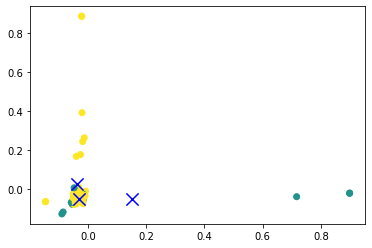

In [7]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


# Test build_features

In [14]:
from src.features import build_features
import logging 

logging.basicConfig(level=logging.INFO)

features = build_features.bag_of_words_tfid_norm()

INFO:src.features.build_features:Building features
INFO:src.features.build_features:Feature building took 58.57 seconds


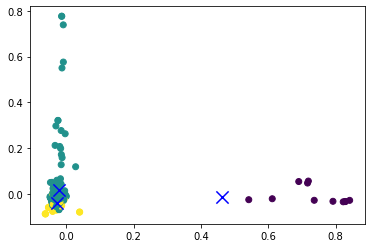

In [16]:
random_state = 1
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [21]:
db.close()